In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm



import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from costfunction import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=3)

# Vanishing Gradient, Data Generation

In [2]:
backend = Aer.get_backend('qasm_simulator')

np.random.seed(42)
x = np.random.uniform(-np.pi/2, np.pi/2, (100, 20))
n = 1
d = 10

### Entangling First and Last

In [4]:
np.random.seed(42)
grad_average = np.zeros((n, d))

for i in tqdm(range(n)):
    network = sequential_qnn(n_qubits=d*[5],
                             dim=d*[5] + [1],
                             encoder = Encoder(),
                             ansatz = Ansatz(blocks=["entangle", "ry"], reps=1),                      
                             cost=NoCost(),
                             optimizer=Adam(lr=0.1),
                             backend = backend,
                             shots = 10000)
    
    network.backward(x[:,:5])
    
    grad_average[i] = np.array([np.mean(np.abs(grad)) for grad in network.weight_gradient_list])
    
saver(grad_average, data_path("vanishing_grad_entangle_first"))

  0%|          | 0/1 [00:00<?, ?it/s]

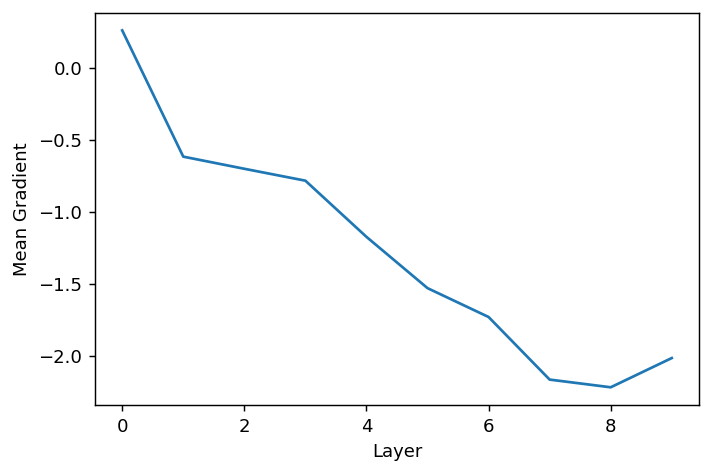

In [5]:
grad_average = loader(data_path("vanishing_grad_entangle_first"))

mean = np.mean(grad_average, axis=0)
std = np.std(grad_average, axis=0)/np.sqrt(n)

log_mean = np.log10(mean)
log_std = np.log10(mean + std) - np.log10(mean)

spacing = list(range(d))
alpha = 0.5

fig=plt.figure(figsize=(6,4), dpi= 130, facecolor='w', edgecolor='k')
plt.fill_between(spacing, log_mean - log_std, log_mean + log_std, alpha=alpha)
plt.plot(spacing, log_mean)

plt.xlabel("Layer")
plt.ylabel("Mean Gradient")
plt.show()

In [6]:
np.random.seed(42)
grad_average = np.zeros((n, d))

for i in tqdm(range(n)):
    network = sequential_qnn(n_qubits=d*[5],
                             dim=d*[5] + [1],
                             encoder = Encoder(),
                             ansatz = Ansatz(blocks=["ry", "entangle"], reps=1),                      
                             cost=NoCost(),
                             optimizer=Adam(lr=0.1),
                             backend = backend,
                             shots = 10000)
    
    network.backward(x[:,:5])
    
    grad_average[i] = np.array([np.mean(np.abs(grad)) for grad in network.weight_gradient_list])
    
saver(grad_average, data_path("vanishing_grad_entangle_last"))

  0%|          | 0/1 [00:00<?, ?it/s]

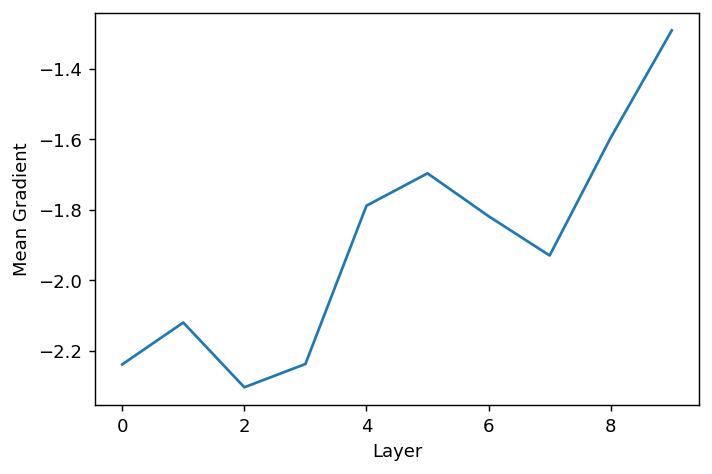

In [7]:
grad_average = loader(data_path("vanishing_grad_entangle_last"))

mean = np.mean(grad_average, axis=0)
std = np.std(grad_average, axis=0)/np.sqrt(n)

log_mean = np.log10(mean)
log_std = np.log10(mean + std) - np.log10(mean)

spacing = list(range(d))
alpha = 0.5

fig=plt.figure(figsize=(6,4), dpi= 130, facecolor='w', edgecolor='k')
plt.fill_between(spacing, log_mean - log_std, log_mean + log_std, alpha=alpha)
plt.plot(spacing, log_mean)

plt.xlabel("Layer")
plt.ylabel("Mean Gradient")
plt.show()

In [8]:
np.random.seed(42)
grad_average = np.zeros((n, d))

for i in tqdm(range(n)):
    network = sequential_qnn(n_qubits=d*[5],
                             dim=d*[5] + [1],
                             encoder = Encoder(),
                             ansatz = Ansatz(blocks=["entangle", "ry"], reps=2),                      
                             cost=NoCost(),
                             optimizer=Adam(lr=0.1),
                             backend = backend,
                             shots = 10000)
    
    network.backward(x[:,:5])
    
    grad_average[i] = np.array([np.mean(np.abs(grad)) for grad in network.weight_gradient_list])
    
saver(grad_average, data_path("vanishing_grad_entangle_first_reps_2"))

  0%|          | 0/1 [00:00<?, ?it/s]

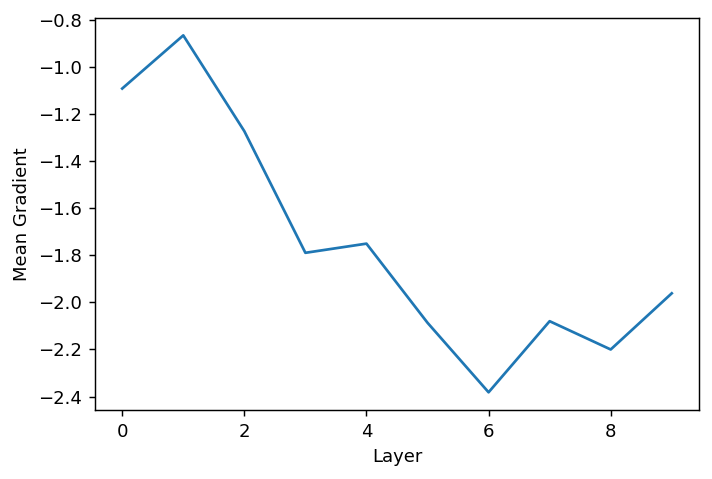

In [9]:
grad_average = loader(data_path("vanishing_grad_entangle_first_reps_2"))

mean = np.mean(grad_average, axis=0)
std = np.std(grad_average, axis=0)/np.sqrt(n)

log_mean = np.log10(mean)
log_std = np.log10(mean + std) - np.log10(mean)

spacing = list(range(d))
alpha = 0.5

fig=plt.figure(figsize=(6,4), dpi= 130, facecolor='w', edgecolor='k')
plt.fill_between(spacing, log_mean - log_std, log_mean + log_std, alpha=alpha)
plt.plot(spacing, log_mean)

plt.xlabel("Layer")
plt.ylabel("Mean Gradient")
plt.show()

In [10]:
np.random.seed(42)
grad_average = np.zeros((n, d))

for i in tqdm(range(n)):
    network = sequential_qnn(n_qubits=d*[5],
                             dim=d*[5] + [1],
                             encoder = Encoder(),
                             ansatz = Ansatz(blocks=["ry", "entangle"], reps=2),                      
                             cost=NoCost(),
                             optimizer=Adam(lr=0.1),
                             backend = backend,
                             shots = 10000)
    
    network.backward(x[:,:5])
    
    grad_average[i] = np.array([np.mean(np.abs(grad)) for grad in network.weight_gradient_list])
    
saver(grad_average, data_path("vanishing_grad_entangle_last_reps_2"))

  0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
grad_average = loader(data_path("vanishing_grad_entangle_last"))

mean = np.mean(grad_average, axis=0)
std = np.std(grad_average, axis=0)/np.sqrt(n)

log_mean = np.log10(mean)
log_std = np.log10(mean + std) - np.log10(mean)

spacing = list(range(d))
alpha = 0.5

fig=plt.figure(figsize=(6,4), dpi= 130, facecolor='w', edgecolor='k')
plt.fill_between(spacing, log_mean - log_std, log_mean + log_std, alpha=alpha)
plt.plot(spacing, log_mean)

plt.xlabel("Layer")
plt.ylabel("Mean Gradient")
plt.show()

## Increasing Reps

In [ ]:
np.random.seed(42)
grad_average = np.zeros((n, d))

for i in tqdm(range(n)):
    network = sequential_qnn(n_qubits=d*[5],
                             dim=d*[5] + [1],
                             cost=NoCost(),
                             backend = backend,
                             shots = 10000)
    
    network.backward(x[:,:5])
    
    grad_average[i] = np.array([np.mean(np.abs(grad)) for grad in network.weight_gradient_list])
    
saver(grad_average, data_path("vanishing_grad_depth_10_width_5_reps_1_shots_10k"))

In [ ]:
grad_average = loader(data_path("vanishing_grad_depth_10_width_5_reps_1_shots_10k"))

mean = np.mean(grad_average, axis=0)
std = np.std(grad_average, axis=0)/np.sqrt(n)

log_mean = np.log10(mean)
log_std = np.log10(mean + std) - np.log10(mean)

spacing = list(range(d))
alpha = 0.5

fig=plt.figure(figsize=(6,4), dpi= 130, facecolor='w', edgecolor='k')
plt.fill_between(spacing, log_mean - log_std, log_mean + log_std, alpha=alpha)
plt.plot(spacing, log_mean)

plt.xlabel("Layer")
plt.ylabel("Mean Gradient")
plt.show()

In [ ]:
np.random.seed(42)
grad_average = np.zeros((n, d))

for i in tqdm(range(n)):
    network = sequential_qnn(n_qubits=d*[5],
                             dim=d*[5] + [1],
                             ansatz=Ansatz(reps=2),
                             cost=NoCost(),
                             backend = backend,
                             shots = 10000)
    
    network.backward(x[:,:5])
    
    grad_average[i] = np.array([np.mean(np.abs(grad)) for grad in network.weight_gradient_list])
    
saver(grad_average, data_path("vanishing_grad_depth_10_width_5_reps_2"))

In [ ]:
grad_average = loader(data_path("vanishing_grad_depth_10_width_5_reps_2"))

mean = np.mean(grad_average, axis=0)
std = np.std(grad_average, axis=0)/np.sqrt(n)

log_mean = np.log10(mean)
log_std = np.log10(mean + std) - np.log10(mean)

spacing = list(range(d))
alpha = 0.5

fig=plt.figure(figsize=(6,4), dpi= 130, facecolor='w', edgecolor='k')
plt.fill_between(spacing, log_mean - log_std, log_mean + log_std, alpha=alpha)
plt.plot(spacing, log_mean)

plt.xlabel("Layer")
plt.ylabel("Mean Gradient")
plt.show()

In [ ]:
np.random.seed(42)
grad_average = np.zeros((n, d))

for i in tqdm(range(n)):
    network = sequential_qnn(n_qubits=d*[5],
                             dim=d*[5] + [1],
                             ansatz=Ansatz(reps=3),
                             cost=NoCost(),
                             backend = backend,
                             shots = 10000)
    
    network.backward(x[:,:5])
    
    grad_average[i] = np.array([np.mean(np.abs(grad)) for grad in  network.weight_gradient_list])
    
saver(grad_average, data_path("vanishing_grad_depth_10_width_5_reps_3"))

In [ ]:
grad_average = loader(data_path("vanishing_grad_depth_10_width_5_reps_3"))

mean = np.mean(grad_average, axis=0)
std = np.std(grad_average, axis=0)/np.sqrt(n)

log_mean = np.log10(mean)
log_std = np.log10(mean + std) - np.log10(mean)

spacing = list(range(d))
alpha = 0.5

fig=plt.figure(figsize=(6,4), dpi= 130, facecolor='w', edgecolor='k')
plt.fill_between(spacing, log_mean - log_std, log_mean + log_std, alpha=alpha)
plt.plot(spacing, log_mean)

plt.xlabel("Layer")
plt.ylabel("Mean Gradient")
plt.show()

## Classical Neural Network

In [ ]:
np.random.seed(42)
grad_average = np.zeros((n, d))

for i in tqdm(range(n)):
    network = sequential_dnn(dim=d*[5] + [1], cost=NoCost(), optimizer=Adam(lr=0.1))
    
    network.backward(x[:,:5])
    
    grad_average[i] = np.array([np.mean(np.abs(grad)) for grad in network.weight_gradient_list])

In [ ]:
mean = np.mean(grad_average, axis=0)
std = np.std(grad_average, axis=0)

log_mean = np.log10(mean)
log_std = np.log10(mean + std) - np.log10(mean)

spacing = list(range(d))
alpha = 0.5

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')
plt.fill_between(spacing, log_mean - log_std, log_mean + log_std, alpha=alpha)
plt.plot(spacing, log_mean)

plt.xlabel("Layer")
plt.ylabel("Mean Gradient")
plt.show()

In [ ]:
np.random.seed(42)
grad_average = np.zeros((n, d))

for i in tqdm(range(n)):
    network = sequential_dnn(dim=d*[10] + [1], cost=NoCost(), optimizer=Adam(lr=0.1))
    
    network.backward(x[:,:10])
    
    grad_average[i] = np.array([np.mean(np.abs(grad)) for grad in network.weight_gradient_list])

In [ ]:

mean = np.mean(grad_average, axis=0)
std = np.std(grad_average, axis=0)

log_mean = np.log10(mean)
log_std = np.log10(mean + std) - np.log10(mean)

spacing = list(range(d))
alpha = 0.5

fig=plt.figure(figsize=(6,4), dpi= 130, facecolor='w', edgecolor='k')
plt.fill_between(spacing, log_mean - log_std, log_mean + log_std, alpha=alpha)
plt.plot(spacing, log_mean)

plt.xlabel("Layer")
plt.ylabel("Mean Gradient")
plt.show()

In [ ]:
np.random.seed(42)
grad_average = np.zeros((n, d))

for i in tqdm(range(n)):
    network = sequential_dnn(dim=d*[15] + [1])
    
    network.backward(x[:,:15], include_loss=False)
    
    grad_average[i] = np.array([np.mean(np.abs(grad)) for grad in network.weight_gradient_list])

In [ ]:

mean = np.mean(grad_average, axis=0)
std = np.std(grad_average, axis=0)

log_mean = np.log10(mean)
log_std = np.log10(mean + std) - np.log10(mean)

spacing = list(range(d))
alpha = 0.5

fig=plt.figure(figsize=(6,4), dpi= 130, facecolor='w', edgecolor='k')
plt.fill_between(spacing, log_mean - log_std, log_mean + log_std, alpha=alpha)
plt.plot(spacing, log_mean)

plt.xlabel("Layer")
plt.ylabel("Mean Gradient")
plt.show()

In [ ]:
np.random.seed(42)

In [ ]:
A = np.random.normal(0, 0.1, (10, 10))
B = np.random.normal(0, 0.1, (10, 10))
C = np.random.normal(0, 0.1, (10, 10))
D = np.random.normal(0, 0.1, (10, 10))
E = np.random.normal(0, 0.1, (10, 10))
F = np.random.normal(0, 0.1, (10, 10))
G = np.random.normal(0, 0.1, (10, 10))

In [ ]:
print(A@B@C@D@E@F@G)